In [226]:
import sys
sys.path.insert("..")
import torch
import torch.nn as nn
from torchvision import transforms

import matplotlib.pyplot as plt

from PIL import Image


In [223]:
path = "/home/antonxue/foo/data/mvtec-ad/bottle/train/good/001.png"

In [227]:
image = Image.open(path)
transforms = transforms.Compose([
    transforms.ToTensor()
])

x = transforms(image)

In [229]:
x.shape

torch.Size([3, 900, 900])

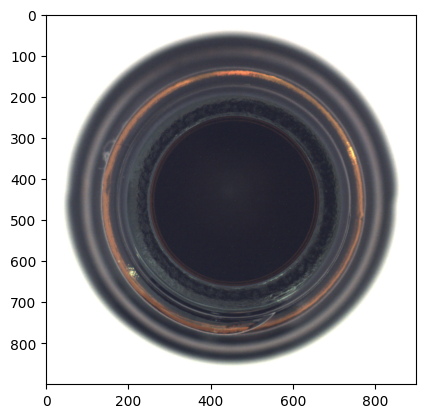

In [230]:
plt.clf()
plt.imshow(x.numpy().transpose(1,2,0))

In [196]:
x = torch.randn(1,256,256)

In [218]:
def a2d_iter(x, k, alpha=0.5):
    a2d = nn.AvgPool2d(3,1,1)
    for _ in range(k):
        x = alpha*x + (1-alpha) * a2d(x)
    return x

In [219]:
xs = [a2d_iter(x, 2**k) for k in range(12)]
qs = [x.quantile(0.90) for x in xs]

<Figure size 640x480 with 0 Axes>

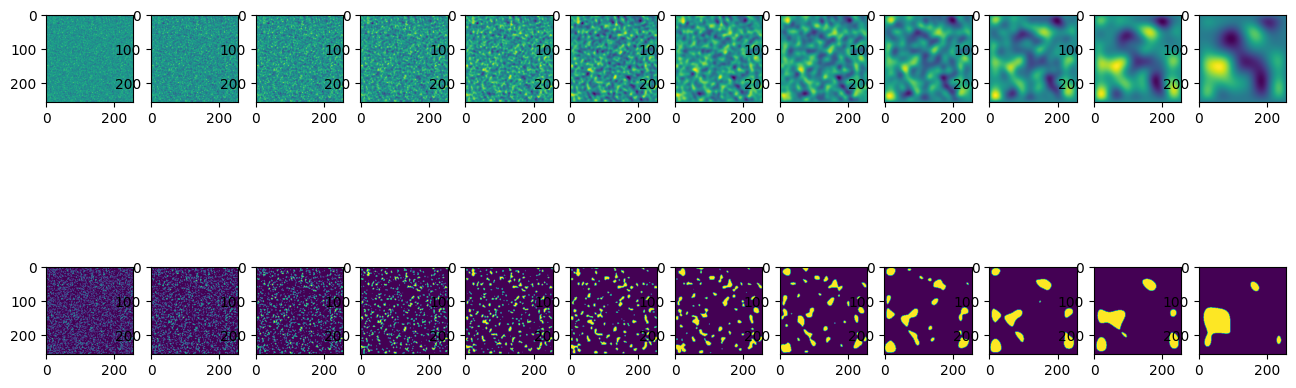

In [220]:
plt.clf()

fig, ax = plt.subplots(2,len(xs), figsize=(16,6))

for i in range(len(xs)):
    ax[0,i].imshow(xs[i].numpy().transpose(1,2,0))
    ax[1,i].imshow((xs[i] > qs[i]).numpy().transpose(1,2,0))


In [221]:
mp2d_iter(x, 4)

tensor([[[1.7648, 1.7648, 1.7648,  ..., 1.2826, 1.2826, 1.2826],
         [1.7648, 1.7648, 1.7648,  ..., 1.5676, 1.5676, 1.5676],
         [1.7648, 1.7648, 1.7648,  ..., 2.3772, 2.3772, 2.3772],
         ...,
         [1.9989, 1.9989, 1.9989,  ..., 1.8880, 1.8880, 1.8880],
         [1.5154, 1.5154, 1.5154,  ..., 1.8880, 1.8880, 1.8880],
         [1.4513, 1.4513, 1.4513,  ..., 1.8880, 1.8880, 1.8880]]])

In [231]:
u = torch.rand(7,3,256,256)

In [232]:
u.flatten(1).quantile(0.97, dim=1)

tensor([0.9699, 0.9697, 0.9705, 0.9696, 0.9707, 0.9710, 0.9695])